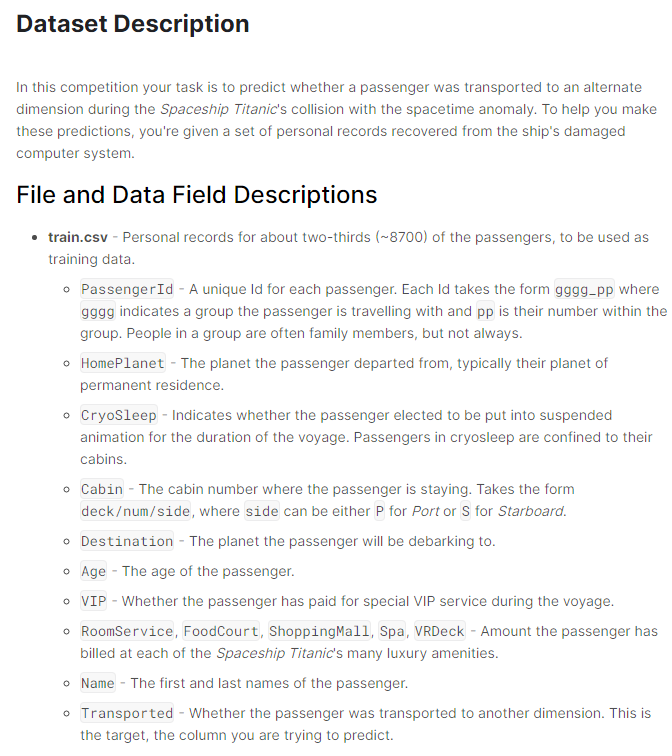

https://www.kaggle.com/competitions/spaceship-titanic/overview

## Importing libraries

In [592]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score, GridSearchCV

## exploratory data analysis

In [593]:
df=pd.read_csv("train.csv")

In [594]:
test=pd.read_csv("test.csv")

In [595]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [596]:
df.drop(["Name"],axis=1,inplace=True)

In [597]:
test.drop(["Name"],axis=1,inplace=True)

In [598]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [599]:
df.shape

(8693, 13)

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [601]:
def splitdns(i):
    i[['Deck', 'Num', 'Side']] = i['Cabin'].str.split('/', expand=True)
    i["group"]=i["PassengerId"].apply(lambda x: int(x[:4]))

In [602]:
splitdns(test)

In [603]:
splitdns(df)

In [604]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,9280


## Data encoding

In [605]:
def totalnull(j,df):
    for i in j:
        print(f"{i}------{df[i].isnull().sum()}")

In [606]:
totalnull(list(df.columns.values),df)

PassengerId------0
HomePlanet------201
CryoSleep------217
Cabin------199
Destination------182
Age------179
VIP------203
RoomService------181
FoodCourt------183
ShoppingMall------208
Spa------183
VRDeck------188
Transported------0
Deck------199
Num------199
Side------199
group------0


In [607]:
df['HomePlanet'].isnull().sum()

201

In [608]:
test['HomePlanet'].isnull().sum()

87

In [609]:
def fillvaluemode(i,df):
    df[i].fillna(df[i].mode()[0],inplace=True)

In [610]:
li=["HomePlanet","CryoSleep","Destination","VIP","Deck","Num","Side","group"]
for i in li:
    fillvaluemode(i,test)
    fillvaluemode(i,df)

In [611]:
def fillvaluemean(i,df):
    df[i].fillna(df[i].mean(),inplace=True)

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
 13  Deck          8693 non-null   object 
 14  Num           8693 non-null   object 
 15  Side          8693 non-null   object 
 16  group         8693 non-null   int64  
dtypes: bool(3), float64(6), int64(1), object(7)
memory usage: 976.4+ KB


In [613]:
li2=["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
for i in li2:
    fillvaluemean(i,test)
    fillvaluemean(i,df)

In [614]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,9280


In [615]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,3,S,13
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,18
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,0,S,19
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,21
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,5,S,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,1496,S,9266
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,F,4,S,9269
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,D,296,P,9271
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,D,297,P,9273


In [616]:
totalnull(list(df.columns.values),df)

PassengerId------0
HomePlanet------0
CryoSleep------0
Cabin------199
Destination------0
Age------0
VIP------0
RoomService------0
FoodCourt------0
ShoppingMall------0
Spa------0
VRDeck------0
Transported------0
Deck------0
Num------0
Side------0
group------0


In [617]:
totalnull(list(test.columns.values),test)

PassengerId------0
HomePlanet------0
CryoSleep------0
Cabin------100
Destination------0
Age------0
VIP------0
RoomService------0
FoodCourt------0
ShoppingMall------0
Spa------0
VRDeck------0
Deck------0
Num------0
Side------0
group------0


In [618]:
df.drop(['PassengerId','Cabin'],inplace=True,axis=1)

In [619]:
test.drop(['PassengerId','Cabin'],inplace=True,axis=1)

In [620]:
def encoder(df):
    df['HomePlanet']=df['HomePlanet'].map({'Earth':0,'Mars':1,'Europa':2})
    df['Destination']=df['Destination'].map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':3})
    df['Side']=df['Side'].map({'P':0,'S':1})
    df['Deck']=df['Deck'].map({'T':0,'E':1,'D':2,'F':3,'A':4,'G':5,'C':6,'B':7})
    df["Num"]=df["Num"].astype('int64')

In [621]:
encoder(df)

In [622]:
encoder(test)

In [623]:
def binaryencoder(i,df):
    val_1 = df[i].unique()[0]
    val_2 = df[i].unique()[1]
    df[i] = df[i].map({val_1 :0, val_2 :1})

In [624]:
bienc=['CryoSleep','VIP','Transported']
for i in bienc:
    binaryencoder(i,df)
for i in bienc[:-1:]:
    binaryencoder(i,test)

In [625]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   int64  
 12  Num           8693 non-null   int64  
 13  Side          8693 non-null   int64  
 14  group         8693 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 1018.8 KB


In [626]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,group
0,0,0,0,27.000000,0,0.0,0.0,0.0,0.0,0.0,5,3,1,13
1,0,1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,3,4,1,18
2,2,0,3,31.000000,0,0.0,0.0,0.0,0.0,0.0,6,0,1,19
3,2,1,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,6,1,1,21
4,0,1,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,3,5,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,34.000000,0,0.0,0.0,0.0,0.0,0.0,5,1496,1,9266
4273,0,1,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,3,4,1,9269
4274,1,0,3,28.658146,0,0.0,0.0,0.0,0.0,0.0,2,296,0,9271
4275,2,1,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,2,297,0,9273


In [627]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,group
0,2,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,7,0,0,1
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,3,0,1,2
2,2,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,4,0,1,3
3,2,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,4,0,1,3
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,3,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,3,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,4,98,0,9276
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,5,1499,1,9278
8690,0,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,5,1500,1,9279
8691,2,0,3,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,608,1,9280


## Exploratory data analysis

Text(0.5, 1.0, 'HomePlanet vs Transported')

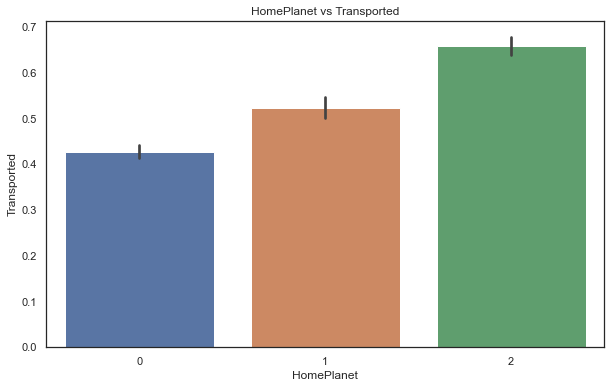

In [628]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['HomePlanet'],y=df['Transported'],ax=ax,order=df.groupby('HomePlanet')['Transported'].mean().reset_index().sort_values('Transported')['HomePlanet'])
plt.title('HomePlanet vs Transported')

Text(0.5, 1.0, 'CryoSleep vs Transported')

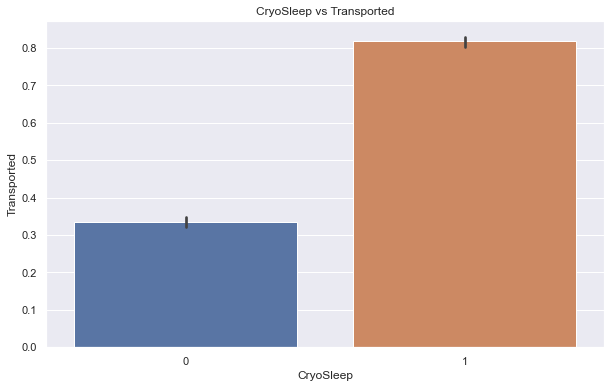

In [629]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['CryoSleep'],y=df['Transported'],ax=ax,order=df.groupby('CryoSleep')['Transported'].mean().reset_index().sort_values('Transported')['CryoSleep'])
plt.title('CryoSleep vs Transported')

Text(0.5, 1.0, 'Destination vs Transported')

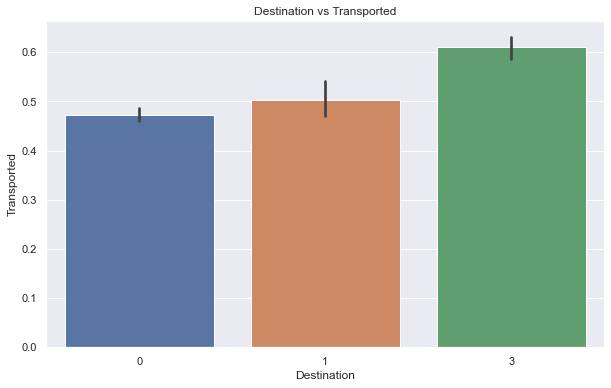

In [630]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Destination'],y=df['Transported'],ax=ax,order=df.groupby('Destination')['Transported'].mean().reset_index().sort_values('Transported')['Destination'])
plt.title('Destination vs Transported')

Text(0.5, 1.0, 'VIP vs Transported')

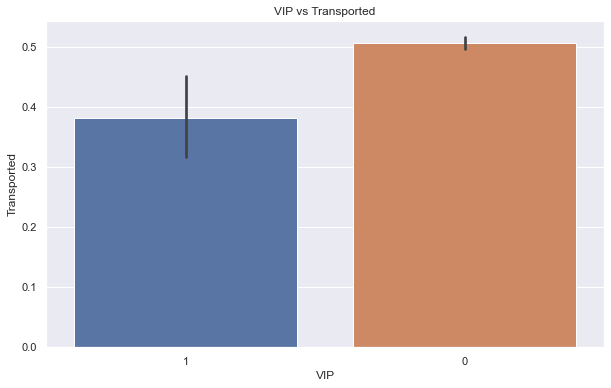

In [631]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['VIP'],y=df['Transported'],ax=ax,order=df.groupby('VIP')['Transported'].mean().reset_index().sort_values('Transported')['VIP'])
plt.title('VIP vs Transported')

Text(0.5, 1.0, 'Age vs Transported')

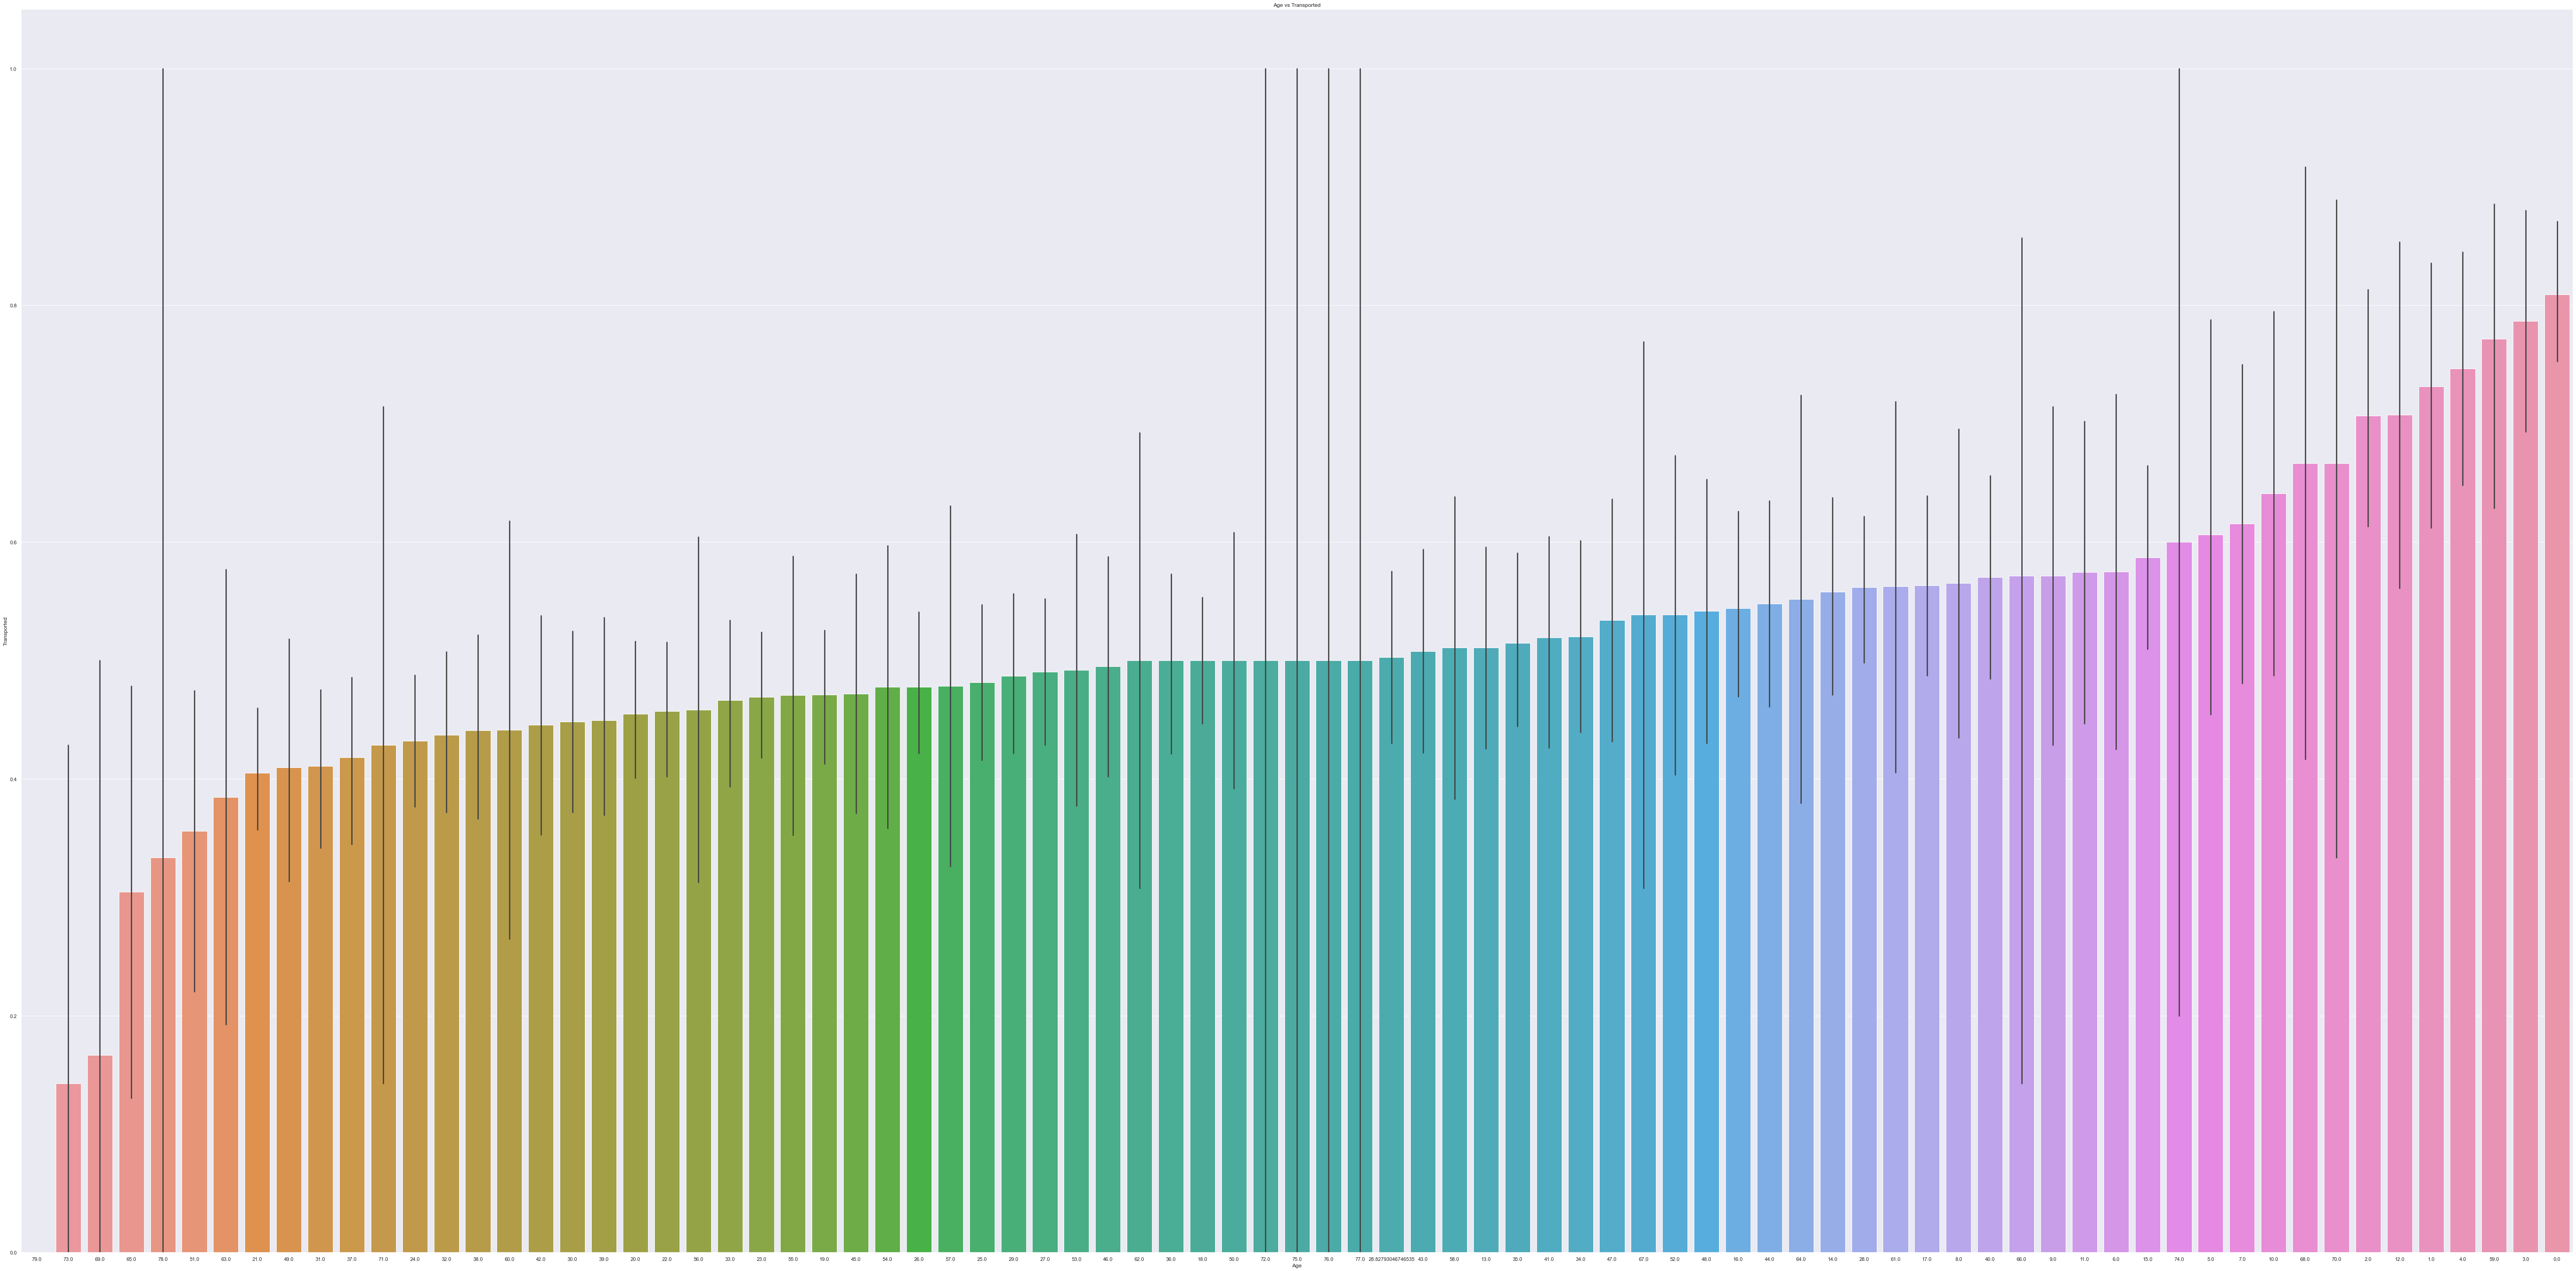

In [632]:
fig,ax=plt.subplots(figsize=(100,50))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Age'],y=df['Transported'],ax=ax,order=df.groupby('Age')['Transported'].mean().reset_index().sort_values('Transported')['Age'])
plt.title('Age vs Transported')

Text(0.5, 1.0, 'Side vs Transported')

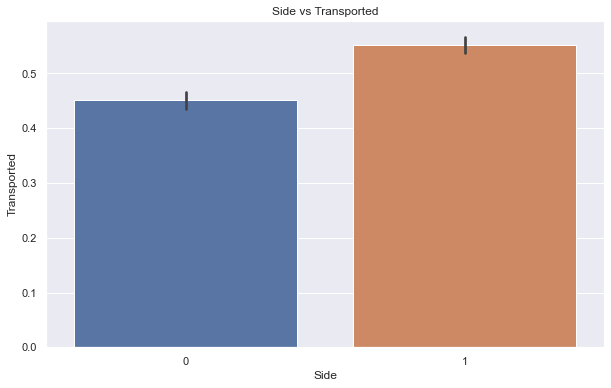

In [633]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Side'],y=df['Transported'],ax=ax,order=df.groupby('Side')['Transported'].mean().reset_index().sort_values('Transported')['Side'])
plt.title('Side vs Transported')

Text(0.5, 1.0, 'Deck vs Transported')

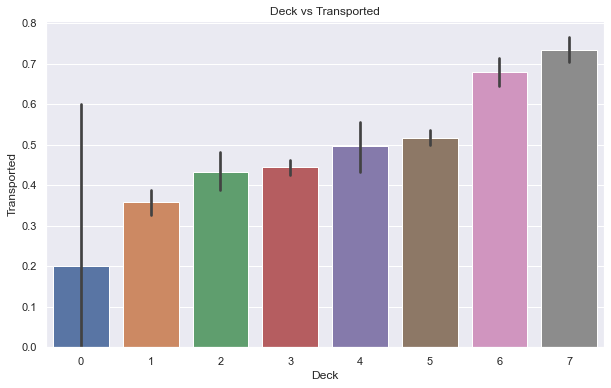

In [634]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['Deck'],y=df['Transported'],ax=ax,order=df.groupby('Deck')['Transported'].mean().reset_index().sort_values('Transported')['Deck'])
plt.title('Deck vs Transported')

In [635]:
df.Deck.value_counts()

3    2993
5    2559
1     876
7     779
6     747
2     478
4     256
0       5
Name: Deck, dtype: int64

In [636]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,group
0,2,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,7,0,0,1
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,3,0,1,2
2,2,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,4,0,1,3
3,2,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,4,0,1,3
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,3,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,3,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,4,98,0,9276
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,5,1499,1,9278
8690,0,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,5,1500,1,9279
8691,2,0,3,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,608,1,9280


In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   int64  
 12  Num           8693 non-null   int64  
 13  Side          8693 non-null   int64  
 14  group         8693 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 1018.8 KB


In [638]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,group
0,0,0,0,27.000000,0,0.0,0.0,0.0,0.0,0.0,5,3,1,13
1,0,1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,3,4,1,18
2,2,0,3,31.000000,0,0.0,0.0,0.0,0.0,0.0,6,0,1,19
3,2,1,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,6,1,1,21
4,0,1,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,3,5,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,34.000000,0,0.0,0.0,0.0,0.0,0.0,5,1496,1,9266
4273,0,1,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,3,4,1,9269
4274,1,0,3,28.658146,0,0.0,0.0,0.0,0.0,0.0,2,296,0,9271
4275,2,1,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,2,297,0,9273


In [639]:
totalnull(list(test.columns.values),df)

HomePlanet------0
CryoSleep------0
Destination------0
Age------0
VIP------0
RoomService------0
FoodCourt------0
ShoppingMall------0
Spa------0
VRDeck------0
Deck------0
Num------0
Side------0
group------0


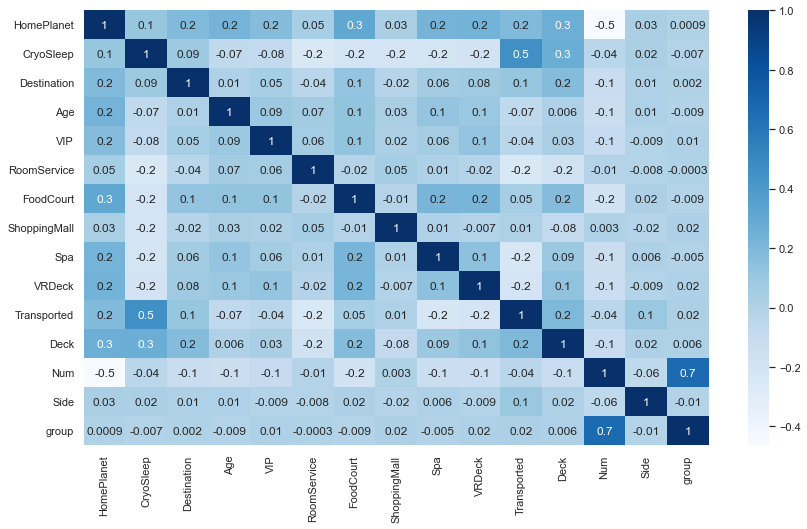

In [640]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [641]:
#sns.pairplot(df, kind="reg")

In [642]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Num', 'Side', 'group'],
      dtype='object')

## model Training

In [643]:
X=df[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck',
       'Num', 'Side', 'group']]
y=df['Transported']

In [644]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [645]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import f1_score,roc_auc_score,confusion_matrix,roc_curve

In [646]:
DecisionTreeClassifier = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
knn = KNeighborsClassifier()
xgbooster = XGBClassifier()
AdaBoost = AdaBoostClassifier()

param_DecisionTreeClassifier = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

param_RandomForest = {
    'n_estimators': [10, 20, 30],
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [2, 3,],
    'min_samples_leaf': [1, 2, 3 ],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

param_knn = {
    'n_neighbors': [3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30]
}


param_AdaBoost = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]
}
param_xgbooster = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

In [647]:
grid_search_DecisionTreeClassifier = GridSearchCV(estimator=DecisionTreeClassifier, param_grid=param_DecisionTreeClassifier, cv=5, scoring='accuracy')
grid_search_RandomForest = GridSearchCV(estimator=RandomForest, param_grid=param_RandomForest, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_knn, cv=5, scoring='accuracy')
grid_search_xgbooster = GridSearchCV(estimator=xgbooster, param_grid=param_xgbooster, cv=5, scoring='accuracy')
grid_search_AdaBoost = GridSearchCV(estimator=AdaBoost, param_grid=param_AdaBoost, cv=5, scoring='accuracy')

In [648]:
grid_search_DecisionTreeClassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [649]:
grid_search_RandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [650]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30], 'n_neighbors': [3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [651]:
grid_search_xgbooster.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [652]:
grid_search_AdaBoost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             scoring='accuracy')

In [653]:
print('Decision Tree:')
print('Best hyperparameters:', grid_search_DecisionTreeClassifier.best_params_)
print('Best score:', grid_search_DecisionTreeClassifier.best_score_)
print('--------------------------------------------')
print('Random Forest:')
print('Best hyperparameters:', grid_search_RandomForest.best_params_)
print('Best score:', grid_search_RandomForest.best_score_)
print('--------------------------------------------')
print('K-Nearest Neighbors:')
print('Best hyperparameters:', grid_search_knn.best_params_)
print('Best score:', grid_search_knn.best_score_)
print('--------------------------------------------')
print('XGbooster')
print('Best hyperparameters:', grid_search_xgbooster.best_params_)
print('Best score:', grid_search_xgbooster.best_score_)
print('---------------------------------------------')
print('AdaBoostClassifier:')
print('Best hyperparameters:', grid_search_AdaBoost.best_params_)
print('Best score:', grid_search_AdaBoost.best_score_)
print('---------------------------------------------')

Decision Tree:
Best hyperparameters: {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7775391649297385
--------------------------------------------
Random Forest:
Best hyperparameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 30}
Best score: 0.7966637531096618
--------------------------------------------
K-Nearest Neighbors:
Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7, 'weights': 'uniform'}
Best score: 0.757407279065317
--------------------------------------------
XGbooster
Best hyperparameters: {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0}
Best score: 0.8071631091963237
---------------------------------------------
AdaBoostClassifier:
Best hyperparameters: {'learning_rate': 0.4, 'n_estimators': 100}
Best score: 0.7975271659020734
---------------------------------------------


In [654]:
y_pred = grid_search_AdaBoost.best_estimator_.predict(X_val)

In [655]:

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.8010350776308223
Precision: 0.7928331466965286
Recall: 0.8147295742232451
F1-score: 0.8036322360953462


## submisiion training

In [656]:
y_pred = grid_search_rf.best_estimator_.predict(test)

In [657]:
y_pred=[i==True if i==1 else False for i in y_pred]

In [658]:
test=pd.read_csv('test.csv')

In [659]:
test['PassengerId']

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [660]:
pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':y_pred})

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,True
4274,9271_01,False
4275,9273_01,True


In [661]:
from pathlib import Path 

In [662]:
(pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':y_pred})).to_csv('out.csv',index=False)